In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor

# import pandas
import pandas as pd

# import train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer


# Previsão do ranking

In [33]:
data = pd.read_csv("../data/df_pooled_ranking.csv")
data.head()


,nome,ida,diff_fase,ponto_virada_encoded,anos_pm,bolsista_encoded,ipv,corraca,ponto_virada,ian,...,idade,sexo_encoded,fase,inde,sexo,na_fase,ano,cg,cf,ct
0,ALUNO-2,8.816667,-2.0,0,0.0,0,7.916665,B,Não,5.0,...,11.0,1.0,0,7.675509,F,0,2022,245.0,66.0,6.0
1,ALUNO-4,0.000000,-1.0,0,2.0,0,7.750000,R,Não,5.0,...,10.0,0.0,1,5.076252,M,0,2020,451.0,69.0,3.0
2,ALUNO-4,5.083333,-1.0,0,0.0,0,8.055553,R,Não,5.0,...,12.0,0.0,2,7.117065,M,0,2022,451.0,69.0,3.0
3,ALUNO-5,7.500000,0.0,0,1.0,0,8.166665,R,Não,10.0,...,10.0,0.0,2,8.077085,M,1,2020,415.0,61.0,12.0
4,ALUNO-5,5.400000,0.0,0,2.0,0,7.400000,R,Não,10.0,...,11.0,0.0,2,7.399000,M,1,2021,415.0,61.0,12.0


In [34]:
data.columns


Index(['nome', 'ida', 'diff_fase', 'ponto_virada_encoded', 'anos_pm',
       'bolsista_encoded', 'ipv', 'corraca', 'ponto_virada', 'ian', 'pedra',
       'pedra_encoded', 'iaa', 'ips', 'ieg', 'ipp', 'idade', 'sexo_encoded',
       'fase', 'inde', 'sexo', 'na_fase', 'ano', 'cg', 'cf', 'ct'],
      dtype='object')

In [35]:
data.drop(
    columns=[
        "sexo_encoded",
        "cf",
        "ct",
        "pedra_encoded",
        "ponto_virada_encoded",
        "nome",
        "corraca",
    ],
    inplace=True,
)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ida               1646 non-null   float64
 1   diff_fase         1646 non-null   float64
 2   anos_pm           1646 non-null   float64
 3   bolsista_encoded  1646 non-null   int64  
 4   ipv               1646 non-null   float64
 5   ponto_virada      1646 non-null   object 
 6   ian               1646 non-null   float64
 7   pedra             1646 non-null   object 
 8   iaa               1646 non-null   float64
 9   ips               1646 non-null   float64
 10  ieg               1646 non-null   float64
 11  ipp               1646 non-null   float64
 12  idade             1646 non-null   float64
 13  fase              1646 non-null   int64  
 14  inde              1646 non-null   float64
 15  sexo              1646 non-null   object 
 16  na_fase           1646 non-null   int64  


In [36]:
data = data.sort_values(by="cg")


In [37]:
kbins = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
# binned = kbins.fit_transform(data[['cg']])
data["cg_cat"] = kbins.fit_transform(data[["cg"]])
data["cg_cat"] = data["cg_cat"].astype("category")


In [38]:
# converts 'idade' to int
data["idade"] = data["idade"].astype(int)

# converts 'ian' to category
data["ian"] = data["ian"].astype("category")

# converts 'sexo' to category
data["sexo"] = data["sexo"].astype("category")

# converts 'pedra' to category
data["pedra"] = data["pedra"].astype("category")

# converts 'ponto_virada' to category
data["ponto_virada"] = data["ponto_virada"].astype("category")

# converts 'fase' to category
data["fase"] = data["fase"].astype("category")

# converts 'na_fase' to boolean
data["na_fase"] = data["na_fase"].astype(bool)

# converts bolsista_encoded to boolean
data["bolsista_encoded"] = data["bolsista_encoded"].astype(bool)

# maps ano to t,t+1,t+2
data["ano"] = data["ano"].apply(
    lambda x: "t0" if x == 2020 else ("t1" if x == 2021 else "t2")
)
data["ano"] = data["ano"].astype("category")

data.head()


,ida,diff_fase,anos_pm,bolsista_encoded,ipv,ponto_virada,ian,pedra,iaa,ips,ieg,ipp,idade,fase,inde,sexo,na_fase,ano,cg,cg_cat
86,9.000000,1.0,1.0,True,9.750010,Sim,10.0,Topázio,10.00002,10.000,10.000000,9.37500,11,3,9.687504,F,False,t0,1.0,0.0
87,8.500000,1.0,2.0,True,9.700000,Sim,10.0,Topázio,10.00000,7.500,9.200000,8.80000,12,4,9.108000,F,False,t1,1.0,0.0
88,8.500000,2.0,3.0,True,9.750010,Sim,10.0,Topázio,10.00002,9.375,9.660714,9.21875,13,5,9.441522,F,False,t2,1.0,0.0
1120,8.511111,0.0,5.0,True,9.666675,Sim,10.0,Topázio,8.75001,9.375,10.000000,9.06250,15,5,9.354308,F,True,t2,2.0,0.0
1119,7.800000,0.0,4.0,True,9.300000,Sim,10.0,Topázio,8.30000,7.500,9.700000,9.20000,14,4,8.866000,F,True,t1,2.0,0.0


In [39]:
data["cg_cat"].value_counts()


cg_cat
8.0    166
0.0    165
9.0    165
2.0    165
6.0    165
4.0    165
1.0    164
3.0    164
5.0    164
7.0    163
Name: count, dtype: int64

In [40]:
data[data["cg_cat"] == 0].head()


,ida,diff_fase,anos_pm,bolsista_encoded,ipv,ponto_virada,ian,pedra,iaa,ips,ieg,ipp,idade,fase,inde,sexo,na_fase,ano,cg,cg_cat
86,9.000000,1.0,1.0,True,9.750010,Sim,10.0,Topázio,10.00002,10.000,10.000000,9.37500,11,3,9.687504,F,False,t0,1.0,0.0
87,8.500000,1.0,2.0,True,9.700000,Sim,10.0,Topázio,10.00000,7.500,9.200000,8.80000,12,4,9.108000,F,False,t1,1.0,0.0
88,8.500000,2.0,3.0,True,9.750010,Sim,10.0,Topázio,10.00002,9.375,9.660714,9.21875,13,5,9.441522,F,False,t2,1.0,0.0
1120,8.511111,0.0,5.0,True,9.666675,Sim,10.0,Topázio,8.75001,9.375,10.000000,9.06250,15,5,9.354308,F,True,t2,2.0,0.0
1119,7.800000,0.0,4.0,True,9.300000,Sim,10.0,Topázio,8.30000,7.500,9.700000,9.20000,14,4,8.866000,F,True,t1,2.0,0.0


In [54]:
# Selecionar as variáveis preditoras e a variável alvo
X = data.drop(columns=["cg", "cg_cat", "pedra"])

# X = X[
#     [
#         "inde",
#         "ano",
#         "pedra",
#         "idade",
#         "fase",
#         "ipv",
#         "diff_fase",
#         "ipp",
#         "ieg",
#         "ian",
#         "ponto_virada",
#         "ida",
#         "ips",
#         "na_fase",
#         "iaa",
#     ]
# ]

# X = X[
#     [
#         "inde",
#         "ano",
#         "ipv",
#         "pedra",
#         "na_fase",
#         "ida",
#         "ipp",
#         "idade",
#         "iaa",
#         "fase",
#         "ieg",
#     ]
# ]


X_train, X_test, y_train, y_test = train_test_split(
    X, data["cg_cat"], test_size=0.25, random_state=41, shuffle=True
)


In [55]:
X_train.head()


,ida,diff_fase,anos_pm,bolsista_encoded,ipv,ponto_virada,ian,iaa,ips,ieg,ipp,idade,fase,inde,sexo,na_fase,ano
83,8.833333,-1.0,0.0,False,8.083335,Não,5.0,7.50002,8.125,8.602541,5.625,9,0,7.728844,F,False,t2
148,5.166667,0.0,3.0,False,5.416658,Não,10.0,9.16668,5.625,6.253788,5.625,13,3,6.409090,F,True,t2
825,6.333333,0.0,5.0,True,8.250000,Não,10.0,8.75001,5.000,9.249513,8.750,13,3,8.016570,F,True,t2
1299,5.833333,-1.0,3.0,False,7.041663,Não,5.0,8.75001,5.625,7.187500,8.125,14,3,6.762500,F,False,t2
213,4.750000,-1.0,0.0,False,7.166660,Não,5.0,9.50002,4.375,9.039886,5.625,11,1,6.641311,F,False,t2


In [56]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


In [57]:
train_data.head()


,ida,diff_fase,anos_pm,bolsista_encoded,ipv,ponto_virada,ian,iaa,ips,ieg,ipp,idade,fase,inde,sexo,na_fase,ano,cg_cat
83,8.833333,-1.0,0.0,False,8.083335,Não,5.0,7.50002,8.125,8.602541,5.625,9,0,7.728844,F,False,t2,2.0
148,5.166667,0.0,3.0,False,5.416658,Não,10.0,9.16668,5.625,6.253788,5.625,13,3,6.409090,F,True,t2,7.0
825,6.333333,0.0,5.0,True,8.250000,Não,10.0,8.75001,5.000,9.249513,8.750,13,3,8.016570,F,True,t2,1.0
1299,5.833333,-1.0,3.0,False,7.041663,Não,5.0,8.75001,5.625,7.187500,8.125,14,3,6.762500,F,False,t2,6.0
213,4.750000,-1.0,0.0,False,7.166660,Não,5.0,9.50002,4.375,9.039886,5.625,11,1,6.641311,F,False,t2,6.0


In [58]:
label = "cg_cat"
print("Summary of class variable: \n", train_data[label].describe())


Summary of class variable: 
 count     1234.0
unique      10.0
top          1.0
freq       136.0
Name: cg_cat, dtype: float64


In [46]:
train_data.dtypes


ida                  float64
diff_fase            float64
anos_pm              float64
bolsista_encoded        bool
ipv                  float64
ponto_virada        category
ian                 category
pedra               category
iaa                  float64
ips                  float64
ieg                  float64
ipp                  float64
idade                  int64
fase                category
inde                 float64
sexo                category
na_fase                 bool
ano                 category
cg_cat              category
dtype: object

In [59]:
time_limit = 1200  # for quick demonstration only, you should set this to longest time you are willing to wait (in seconds)

save_path = "agModels-predictRanking_mq"  # specifies folder to store trained models
predictor = TabularPredictor(
    label=label, path=save_path, problem_type="multiclass"
).fit(train_data, presets="good_quality", num_gpus=2, time_limit=time_limit)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Mar 29 23:14:13 UTC 2024
CPU Count:          16
Memory Avail:       8.49 GB / 15.49 GB (54.8%)
Disk Space Avail:   913.98 GB / 1006.85 GB (90.8%)
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected

In [48]:
y_test = test_data[label]  # values to predict
test_data_nolab = X_test  # delete label column to prove we're not cheating
test_data_nolab.head()


,ida,diff_fase,anos_pm,bolsista_encoded,ipv,ponto_virada,ian,pedra,iaa,ips,ieg,ipp,idade,fase,inde,sexo,na_fase,ano
918,6.250000,-2.0,0.0,False,7.416660,Não,5.0,Ágata,9.50002,5.625,8.406839,4.68750,11,0,6.895952,F,False,t2
516,7.666667,-2.0,2.0,False,7.250002,Não,5.0,Ágata,9.58335,7.500,5.900000,7.65625,15,3,7.137294,M,False,t0
1252,5.000000,-1.0,1.0,False,7.222220,Não,5.0,Ágata,8.00002,7.500,8.600000,7.50000,10,1,6.964446,F,False,t0
988,9.000000,0.0,3.0,True,8.944453,Sim,10.0,Ametista,7.08333,5.000,8.300000,8.75000,14,4,8.332224,F,True,t0
589,9.100000,-1.0,5.0,True,9.800000,Sim,5.0,Topázio,10.00000,7.500,10.000000,9.80000,13,2,9.021000,F,False,t1


In [49]:
predictor = TabularPredictor.load(
    save_path
)  # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred = predictor.predict(test_data_nolab)
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(
    y_true=y_test, y_pred=y_pred, auxiliary_metrics=True
)


Predictions:  
 918     5.0
516     9.0
1252    5.0
988     0.0
589     0.0
       ... 
226     3.0
534     2.0
420     8.0
1216    6.0
608     5.0
Name: cg_cat, Length: 412, dtype: float64


In [50]:
perf


{'accuracy': 0.587378640776699,
 'balanced_accuracy': 0.5870368169635106,
 'mcc': 0.5445284973790423}

In [51]:
predictor.leaderboard(test_data, silent=True)


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestEntr,0.589806,0.570850,accuracy,0.244982,0.175851,1.362021,0.244982,0.175851,1.362021,1,True,7
1,WeightedEnsemble_L2,0.587379,0.619433,accuracy,0.072504,0.026670,8.195060,0.005534,0.001533,0.158599,2,True,14
2,CatBoost,0.584951,0.615385,accuracy,0.009373,0.004433,4.690677,0.009373,0.004433,4.690677,1,True,8
3,XGBoost,0.584951,0.607287,accuracy,0.135648,0.131585,28.648186,0.135648,0.131585,28.648186,1,True,11
4,LightGBM,0.572816,0.603239,accuracy,0.010360,0.004616,2.519001,0.010360,0.004616,2.519001,1,True,5
5,LightGBMLarge,0.567961,0.607287,accuracy,0.057856,0.011949,5.208240,0.057856,0.011949,5.208240,1,True,13
6,RandomForestGini,0.565534,0.570850,accuracy,0.228354,0.177824,1.367126,0.228354,0.177824,1.367126,1,True,6
7,LightGBMXT,0.507282,0.542510,accuracy,0.057596,0.020705,3.345784,0.057596,0.020705,3.345784,1,True,4
8,NeuralNetTorch,0.504854,0.550607,accuracy,0.034472,0.018376,18.979556,0.034472,0.018376,18.979556,1,True,12
9,ExtraTreesGini,0.504854,0.502024,accuracy,0.209243,0.182852,0.564738,0.209243,0.182852,0.564738,1,True,9


In [29]:
results = predictor.fit_summary(show_plot=True)


*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              CatBoost   0.611336    accuracy       0.004603   3.566948                0.004603           3.566948            1       True          8
1   WeightedEnsemble_L2   0.611336    accuracy       0.005571   3.733030                0.000969           0.166082            2       True         14
2               XGBoost   0.607287    accuracy       0.010040  16.035740                0.010040          16.035740            1       True         11
3              LightGBM   0.603239    accuracy       0.003996   2.176228                0.003996           2.176228            1       True          5
4         LightGBMLarge   0.562753    accuracy       0.004478   4.266888                0.004478           4.266888            1       True         13
5      RandomForestEntr   0.5587

gio: file:///home/alien-wsl/projects/datathon_app/datathonapp/notebooks/agModels-predictRanking_mqSummaryOfModels.html: Failed to find default application for content type ‘text/html’


In [29]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)


AutoGluon infers problem type is:  multiclass
AutoGluon identified the following types of features:
('category', [])  : 4 | ['ano', 'pedra', 'fase', 'ian']
('float', [])     : 8 | ['inde', 'ipv', 'diff_fase', 'ipp', 'ieg', ...]
('int', [])       : 1 | ['idade']
('int', ['bool']) : 2 | ['ponto_virada', 'na_fase']


In [52]:
predictor.feature_importance(test_data)


Computing feature importance via permutation shuffling for 18 features using 412 rows with 5 shuffle sets...
	8.93s	= Expected runtime (1.79s per shuffle set)
	2.69s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
inde,0.477184,0.017214,2.028757e-07,5,0.512629,0.441740
ano,0.091748,0.013116,4.877954e-05,5,0.118753,0.064742
bolsista_encoded,0.008738,0.004061,4.290459e-03,5,0.017100,0.000375
ida,0.001456,0.002171,1.040000e-01,5,0.005926,-0.003014
ponto_virada,0.000000,0.004541,5.000000e-01,5,0.009350,-0.009350
ipv,0.000000,0.006865,5.000000e-01,5,0.014135,-0.014135
diff_fase,-0.000485,0.001085,8.130495e-01,5,0.001750,-0.002720
ian,-0.000485,0.002031,6.893459e-01,5,0.003696,-0.004667
ips,-0.000971,0.003681,7.064752e-01,5,0.006608,-0.008550
anos_pm,-0.001942,0.009463,6.649100e-01,5,0.017543,-0.021426


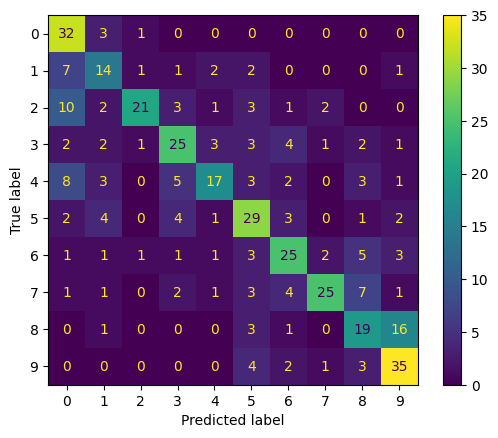

In [53]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

cm_display.plot()
plt.show()


In [32]:
features_importance = predictor.feature_importance(test_data)


Computing feature importance via permutation shuffling for 15 features using 412 rows with 5 shuffle sets...
	92.09s	= Expected runtime (18.42s per shuffle set)
	9.52s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [33]:
features_importance[features_importance["importance"] > 0].index.to_list()


['inde',
 'ano',
 'ipv',
 'pedra',
 'na_fase',
 'ida',
 'ipp',
 'idade',
 'iaa',
 'fase',
 'ieg']